<a href="https://colab.research.google.com/github/penscola/Machine-Learning-Zoomcamp/blob/master/Deep_Learning/notebook/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Bee or Wasp Prediction<center>

## Objective
The primary objective of this project is to develop a robust and accurate machine learning model capable of classifying images as either bees or wasps. The model aims to leverage the power of computer vision to distinguish between these two closely related insect species based on visual features within images.

For this we will use the dataset from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) in creation of the model.

## Importing the libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [4]:
train_dir = '/content/drive/MyDrive/Deep_Learning/data/train'
test_dir = '/content/drive/MyDrive/Deep_Learning/data/test'

## Model Creation

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# Compiling the model
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

## Initializing image data generator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Training data generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [10]:
# Validating data generator
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 918 images belonging to 2 classes.


In [11]:
# doing inspection
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Training the Model

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)


Epoch 1/10
184/184 [==============================] - 1126s 6s/step - loss: 0.6634 - acc: 0.5883 - val_loss: 0.6204 - val_acc: 0.6601
Epoch 2/10
184/184 [==============================] - 91s 493ms/step - loss: 0.6175 - acc: 0.6549 - val_loss: 0.7397 - val_acc: 0.5468
Epoch 3/10
184/184 [==============================] - 95s 518ms/step - loss: 0.5751 - acc: 0.7027 - val_loss: 0.5822 - val_acc: 0.7092
Epoch 4/10
184/184 [==============================] - 96s 519ms/step - loss: 0.5344 - acc: 0.7376 - val_loss: 0.5250 - val_acc: 0.7473
Epoch 5/10
184/184 [==============================] - 97s 529ms/step - loss: 0.5005 - acc: 0.7580 - val_loss: 0.5306 - val_acc: 0.7418
Epoch 6/10
184/184 [==============================] - 95s 516ms/step - loss: 0.4753 - acc: 0.7871 - val_loss: 0.5072 - val_acc: 0.7702
Epoch 7/10
184/184 [==============================] - 95s 514ms/step - loss: 0.4476 - acc: 0.8055 - val_loss: 0.5157 - val_acc: 0.7462
Epoch 8/10
184/184 [==============================] - 98

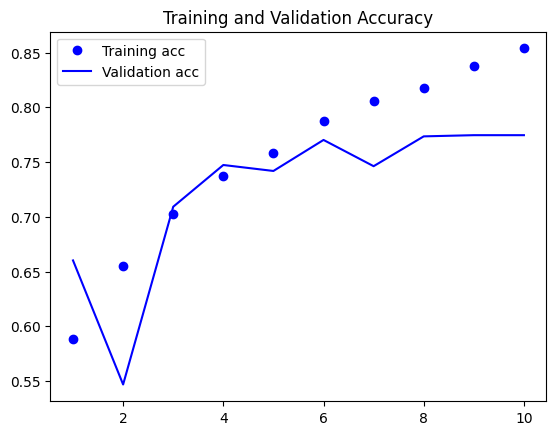

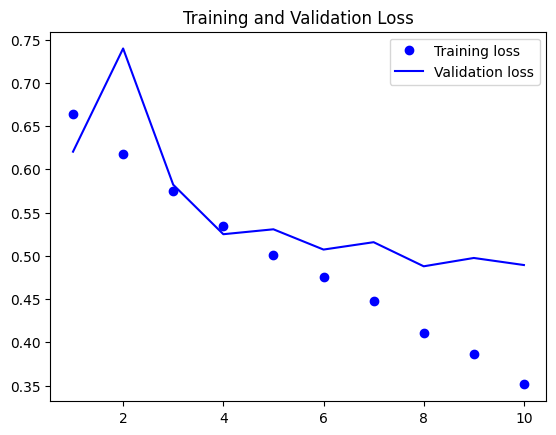

In [14]:
# Plot accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [15]:
# Median accuracy
acc_median = np.median(acc)
acc_median

0.7725047469139099

In [16]:
# Standard deviation of loss
loss_std = np.std(loss)
loss_std

0.09665881094167207

## Data Argumentation

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

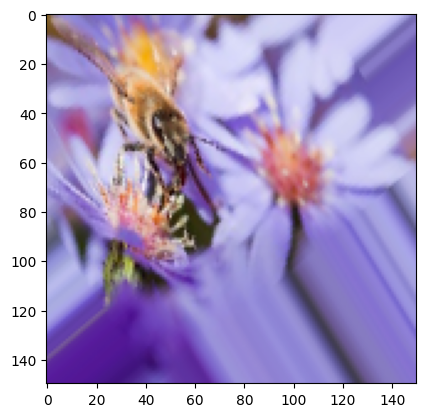

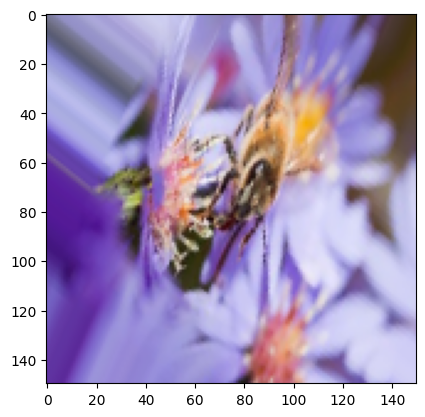

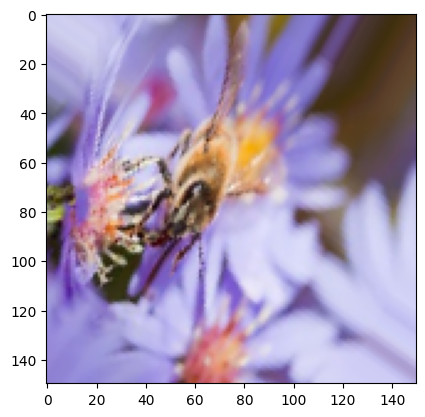

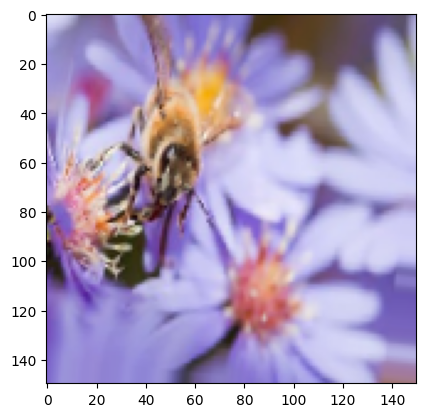

In [20]:
fnames = [os.path.join(train_dir+"/bee", fname) for
    fname in os.listdir(train_dir+"/bee")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [36]:
# Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [37]:
# Validation
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 918 images belonging to 2 classes.


In [43]:
model.save_weights('/content/drive/MyDrive/Deep_Learning/data/model/model_v1.h5', save_format='h5')

In [44]:
chechpoint = keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Deep_Learning/data/model/xception_v1_{epoch:02d}_{val_acc:.3f}.h5',
    save_best_only=True,
    monitor='val_acc',
    mode='max'
)

In [45]:
# Train the model with the ModelCheckpoint callback
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[chechpoint]
)

Epoch 1/10
115/115 [==============================] - 114s 987ms/step - loss: 0.4532 - acc: 0.7919 - val_loss: 0.4694 - val_acc: 0.7756
Epoch 2/10
115/115 [==============================] - 107s 928ms/step - loss: 0.4399 - acc: 0.7990 - val_loss: 0.4421 - val_acc: 0.8094
Epoch 3/10
115/115 [==============================] - 104s 899ms/step - loss: 0.4485 - acc: 0.7936 - val_loss: 0.4290 - val_acc: 0.8083
Epoch 4/10
115/115 [==============================] - 107s 934ms/step - loss: 0.4503 - acc: 0.7955 - val_loss: 0.4417 - val_acc: 0.7887
Epoch 5/10
115/115 [==============================] - 103s 887ms/step - loss: 0.4387 - acc: 0.7952 - val_loss: 0.4447 - val_acc: 0.7963
Epoch 6/10
115/115 [==============================] - 105s 917ms/step - loss: 0.4514 - acc: 0.7884 - val_loss: 0.4523 - val_acc: 0.7974
Epoch 7/10
115/115 [==============================] - 121s 1s/step - loss: 0.4425 - acc: 0.7998 - val_loss: 0.5086 - val_acc: 0.7756
Epoch 8/10
115/115 [==============================]

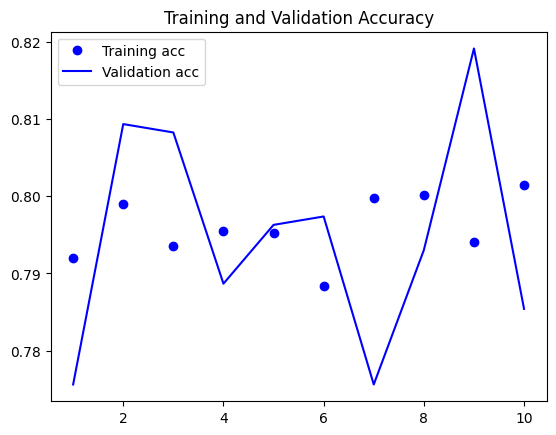

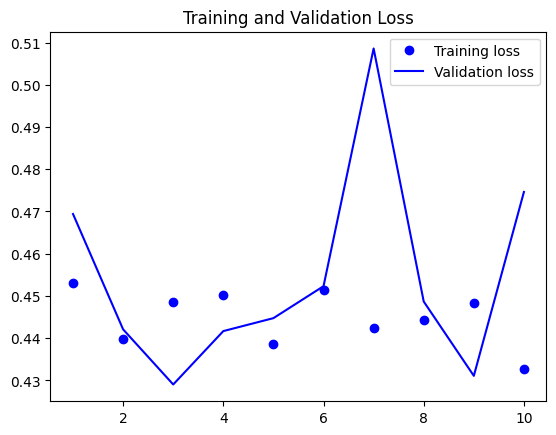

In [46]:
# Visualizing accuracy and loss
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [47]:
# validation loss
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.45421667098999025

In [48]:
# Accuracy
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7941176414489746